In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv("Data/loan.csv")
shape = df.shape
print("Shape of the dataset is: ", shape)
df.head()

Shape of the dataset is:  (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- There are 111 columns in the given dataset

## 1. Data Cleaning

In [3]:
##find columns with 100% missing values
missing = 100*(df.isnull().sum()/df.shape[0]).to_frame()
missing = missing[missing[0]==100]
missing.shape

(54, 1)

In [4]:
## names of above 54 columns
list(missing.index)

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [5]:
#drop the above columns
df.drop(columns=list(missing.index),inplace=True)

In [6]:
#remaining columns
len(df.columns)

57

- We are now left with 57 columns after dropping 54 of columns with no data

In [7]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


### Dropping below columns:
- Cannot predict next_payment_date, so it's better to drop the column which has 97.129693% of missing data
- Months since last record, this field has 92.985372% of missing data. We do not know what NA means here. So dropping it.
- mths_since_last_delinq has 65% of missing data, and this field isn't that relevant to work with only 35% available data.
- desc, its just description/reason for the loan.
- emp_title is not relevant here so dropping it

In [8]:
df.drop(columns=["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","mths_since_last_record","desc","emp_title"],inplace=True)

In [9]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998
revol_util,0.125891
tax_liens,0.098195
title,0.027696
last_credit_pull_d,0.005036
total_rec_prncp,0.000000


In [10]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [11]:
## creating a new category for missing values of employment experience
df.emp_length.fillna("Not Available",inplace=True)

In [12]:
## bankruptcies vs loan_status to impute missing values, we assume if NA in pub_rec_bankruptcies then we will check 
## if the person has fully paid the loan or is paying we replace with 0, else drop, because though he is a defaulter he can still have 0 bankruptcies
temp = df.loc[:,["pub_rec_bankruptcies","loan_status"]]
temp.head()

,pub_rec_bankruptcies,loan_status
0,0.0,Fully Paid
1,0.0,Charged Off
2,0.0,Fully Paid
3,0.0,Fully Paid
4,0.0,Current


In [13]:
## checking the categories in missing bankrupties
temp[temp.pub_rec_bankruptcies.isnull()].loan_status.value_counts()

Fully Paid     579
Charged Off    118
Name: loan_status, dtype: int64

In [14]:
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

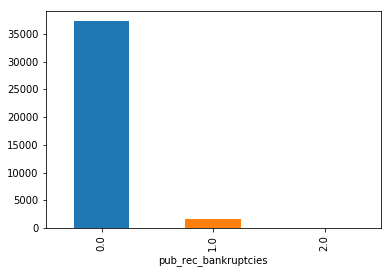

In [15]:
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count().plot.bar()

In [16]:
## checking the number of fully paid people with respect to their bankruptcies
temp[(temp.pub_rec_bankruptcies == 1) | (temp.pub_rec_bankruptcies == 2)].loan_status.value_counts()

Fully Paid     1274
Charged Off     368
Current          39
Name: loan_status, dtype: int64

In [17]:
## can 0 be replaced for NAs if they have fully paid the loans? Get the count of majority
temp[(temp.pub_rec_bankruptcies == 0)].loan_status.value_counts()

Fully Paid     31097
Charged Off     5141
Current         1101
Name: loan_status, dtype: int64

- We will now replace NAs where they have fully paid , with 0 bankrupties as we saw above that majority of them with 0 bankrupties have paid their loans
- We will drop the missing NAs in pub_rec_bankruptcies if they have been charged_off for their loans. This is because, we dont want to deal with such data as there are no evident proofs to impute right values in pub_rec_bankruptcies.

In [18]:
## Replace/Drop based on above assumptions
def replace_na_pub_rec_bankruptcies(x,y):
    if np.isnan(y):
        if x == "Fully Paid":
            return 0
        else:
            return y
    else:
        return y


df_temp = df

##replace values
df_temp["pub_rec_bankruptcies"] = df_temp.apply(lambda x: replace_na_pub_rec_bankruptcies(x.loan_status,x.pub_rec_bankruptcies),axis=1)
print(df_temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count())

##drop remaining
df_temp = df_temp[~df_temp.pub_rec_bankruptcies.isnull()]

df = df_temp


pub_rec_bankruptcies
0.0    37918
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [19]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
last_pymnt_d,0.179297
chargeoff_within_12_mths,0.128791
collections_12_mths_ex_med,0.128791
revol_util,0.126266
tax_liens,0.095962
title,0.027778
last_credit_pull_d,0.005051
total_rec_int,0.000000
total_acc,0.000000
initial_list_status,0.000000


In [20]:
 #Remove all the rows with missing last payment due
df = df[~df.last_pymnt_d.isnull()]

In [21]:
## types of values in chargeoff_within_12_mths 
df.chargeoff_within_12_mths.value_counts()

0.0    39477
Name: chargeoff_within_12_mths, dtype: int64

In [22]:
## types of values in chargeoff_within_12_mths 
df.collections_12_mths_ex_med.value_counts()

0.0    39477
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
#Dropping the above two column as it has only 0's 
df.drop(columns=["chargeoff_within_12_mths"],inplace=True)

In [24]:
df.drop(columns=["collections_12_mths_ex_med"],inplace=True)

In [25]:
charged_off = df[df.loan_status == "Charged Off" ]
current = df[df.loan_status == "Current"]
fully_paid = df[df.loan_status == "Fully Paid"]
print("Values in charged off: " , charged_off.revol_util.value_counts(),"\n")
print("Values in current: ", current.revol_util.value_counts(),"\n")
print("values in fully paid:" , fully_paid.revol_util.value_counts(),"\n")

Values in charged off:  0%        140
66.60%     17
89.40%     15
63.70%     15
77.60%     14
66.30%     14
73.40%     14
45.10%     14
72.70%     13
71.70%     13
89.90%     13
66.70%     13
80.60%     13
70.80%     12
81.60%     12
89.50%     12
57.40%     12
72.40%     12
94.60%     12
32%        12
75.50%     12
57.70%     12
80.30%     12
97.50%     11
93.20%     11
55.50%     11
76%        11
95.30%     11
99%        11
87.60%     11
         ... 
99.70%      1
6.20%       1
30.30%      1
12.50%      1
24.89%      1
44.70%      1
7.64%       1
1.88%       1
22.60%      1
35.50%      1
6.30%       1
17.20%      1
36.60%      1
20.40%      1
2.10%       1
7.70%       1
5.50%       1
7.80%       1
31.90%      1
29.77%      1
12.60%      1
8.50%       1
24.63%      1
3.70%       1
22.40%      1
15.40%      1
87.30%      1
9.50%       1
12.40%      1
8.60%       1
Name: revol_util, Length: 995, dtype: int64 

Values in current:  0%        23
88.20%     5
73.10%     5
35.70%     5
73% 

In [26]:
temp = df[~df.revol_util.isnull()]
temp.revol_util = temp.revol_util.apply(lambda x: float(x[:-1]))


In [27]:
temp.revol_util.describe()

count    39482.000000
mean        48.831837
std         28.330776
min          0.000000
25%         25.400000
50%         49.300000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

#### revol_util
- AS we see above that the std is very high , we cannot replace the nulls with median
- We can still replace the values with mean, but since its just 0.1% data we can choose drop those rows

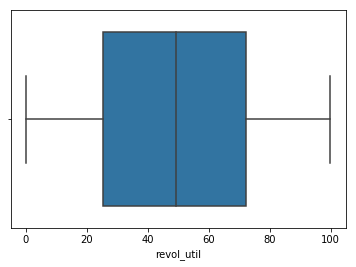

In [28]:
sns.boxplot(temp.revol_util)

In [29]:
##remove missing rows of revol_util
df = df[~df.revol_util.isnull()]

In [30]:
df.tax_liens.value_counts()

0.0    39444
Name: tax_liens, dtype: int64

- tax liens has only 0's and NAs, we can drop that column
- Title and last_credit_pull_d missing valued rows are dropped as they are around 0.1% and 0.05%

In [31]:
##drop tax_liens column
df.drop(columns=["tax_liens"],inplace=True)

## remove rows where title and last_credit_pull_d
df = df[~df.title.isnull()]
df = df[~df.last_credit_pull_d.isnull()]

In [32]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
id,0.0
inq_last_6mths,0.0
pub_rec,0.0
revol_bal,0.0
revol_util,0.0
total_acc,0.0
initial_list_status,0.0
out_prncp,0.0
out_prncp_inv,0.0
total_pymnt,0.0


In [33]:
#checking no. of value_counts for column
df.initial_list_status.value_counts()

f    39469
Name: initial_list_status, dtype: int64

In [34]:
#checking no. of value_counts for policy_code column
df.policy_code.value_counts()

1    39469
Name: policy_code, dtype: int64

In [35]:
#checking no. of value_counts for application_type column
df.application_type.value_counts()

INDIVIDUAL    39469
Name: application_type, dtype: int64

In [36]:
#checking no. of value_counts for acc_now_delinq column
df.acc_now_delinq.value_counts()

0    39469
Name: acc_now_delinq, dtype: int64

In [37]:
#checking no. of value_counts for delinq_amnt column
df.delinq_amnt.value_counts()

0    39469
Name: delinq_amnt, dtype: int64

In [38]:
#checking no. of value_counts for pymnt_plan column
df.pymnt_plan.value_counts()

n    39469
Name: pymnt_plan, dtype: int64

In [39]:
#lets find out co-relation between out_prncp and out_prncp_inv columns
df[['out_prncp','out_prncp_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 99% positive co-relation. So we can drop any one column

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999827
out_prncp_inv,0.999827,1.000000


In [40]:
#lets find out co-relation between total_pymnt and total_pymnt_inv columns
df[['total_pymnt','total_pymnt_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 97% positive co-relation. So we can drop any one column



,total_pymnt,total_pymnt_inv
total_pymnt,1.000000,0.971624
total_pymnt_inv,0.971624,1.000000


In [41]:
#lets find out co-relation between funded_amnt and funded_amnt_inv columns
df[['funded_amnt','funded_amnt_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 96% positive co-relation. So we can drop any one column

,funded_amnt,funded_amnt_inv
funded_amnt,1.000000,0.962914
funded_amnt_inv,0.962914,1.000000


#### list of columns to keep based on assumptions below
- id : loan_id
- pub_rec: We can analyze effect of loan status on derogatry public record.
- revol_bal: we can check credit effect on loan_defaulters
- revol_util: we can check whether deafulters behaviour toward credit utilization
- total_acc: we are expecting positive co-relation between defaulting and  total number of credit lines
- out_prncp : co-relation between out_prncp_inv and out_prncp is very high. So keeping out_prncp.
- total_pymnt : co-relation between total_pymnt_inv and total_pymnt is very high. So keeping total_pymnt.
- term : loans are given in two terms i.e. 3years or 5years. So, we can analyse effect of loan terms on defaulters
- int_rate : it is key factor in any loans purchase.
- installment : it is also key factor in any loan process
- total_rec_int : it is also key factor in any loan process
- total_rec_late_fee : it is also known key factor in any loan process
- last_pymnt_d : we can derive another column using issue_d and last_pymnt_d to get probable time period of defaulting 
- issue_d : important for above requirement
- open_acc : to check if credit lines are affecting default rate
- earliest_cr_line : We can find how quick a person is to default after he is given a credit line
- delinq_2yrs : We can see behaviour of a defaulter in the last two years over his alloted credit  
- loan_amnt: Main criteria to decide the defaulting rate
- grade: We can check the relation between level of loan given and the defaulting behaviour
- sub_grade: We can check the relation between subgrade of LC and the defaulting behaviour. And also which subgrades within a grade are more susciptable for defaulting
- emp_length : Will help in work experience v/s defaulting comparision
- home_ownership: The home ownership usually gives confidence to get a loan. Good metric for comparision
- annual_inc : Good metric to evaluate on this front.
- verification_status : income verification plays a key role in defaulting behaviour usually.
- loan_status: A kind of target variable for this EDA
- purpose: good metric to see the reason of loan and eventual defaulting behavior if any.
- state: origin state behaviour on defaulting can be checked
- dti - debt to income is a ratio if more , chances of defaulting are more. But we will indulge later based on data for this.
- pub_rec_bankruptcies: relation between this and defaulting is an intersting insight.

#### list of columns to drop
- inq_last_6mths : Since person's enquiry process is what we are not concerned about.
- initial_list_status : There is only one value in entire column.
- out_prncp_inv : co-relation between out_prncp_inv and out_prncp is very high. So dropping out_prncp_inv.
- total_pymnt_inv : co-relation between total_pymnt_inv and total_pymnt is very high. So dropping total_pymnt_inv
- funded_amnt : amount of loan amount committed when approved at that time, we are focussing more on what is approved.
- total_rec_prncp : its the difference of loan approved and outstanding principal. We are choosing out_prncp
- recoveries : since this is post loan application process, we are not concerned about it.
- collection_recovery_fee : this column values amount to recovery fees required for collection through third party agencies or any other means. So, we can ignore this column as it is post charge off process.
- last_pymnt_amnt: As this amount refers to last month's payment, no insight can be drawn from this column. It is better to drop it.
- last_credit_pull_d : This colum values are last month's credit line pulled for this loan. So, not much meaningful insight can be drawn from it.
- policy_code : There is only one value throught column. Hence we can drop it.
- application_type : There is only one value throught column. Hence we can drop it. 
- acc_now_delinq : There is only one value throught column. Hence we can drop it.
- delinq_amnt : There is only one value throught column. Hence we can drop it.
- member_id: we can eliminate, just keeping id is enough because both were unique
- funded_amnt_inv : co-relation between funded_amnt_inv and funded_amnt is very high. So dropping funded_amnt_inv
- pymnt_plan: There is only one value throught column. Hence we can drop it.
- url: We can remove this as its the url of the loan which looks like https://lendingclub.com/browse/loanDetail.action?loan_id=1077501 and we are anyways keeping the id column.
- title: we can ignore this column, as we are looking at purpose column. Going indepth for this column requires more processing like clustering etc..
- zip_code :  Doesn't have significant value to decide defaulter behaviour based on his origin place, doing on state level is better
 
    ["inq_last_6mths", "initial_list_status" , "out_prncp_inv" , "total_pymnt_inv" , "recoveries", "collection_recovery_fee" ,"last_pymnt_amnt", "last_credit_pull_d" , "policy_code" , "application_type","member_id","funded_amnt_inv","pymnt_plan","url","title","zip_code","acc_now_delinq","delinq_amnt","funded_amnt","total_rec_prncp"]

In [42]:
df = df.drop(columns = ["inq_last_6mths", "initial_list_status" , "out_prncp_inv" , "total_pymnt_inv" , "recoveries", "collection_recovery_fee" ,"last_pymnt_amnt", "last_credit_pull_d" , "policy_code" , "application_type","member_id","funded_amnt_inv","pymnt_plan","url","title","zip_code","acc_now_delinq","delinq_amnt","funded_amnt","total_rec_prncp"])

In [43]:
##Lets check the type of values in loan_status
df.loan_status.value_counts()

Fully Paid     32906
Charged Off     5423
Current         1140
Name: loan_status, dtype: int64

#### Since people who are currently paying will not add any insight on their defaulting behaviour, let's drop those rows
#### Since these values are just two and we are focussing more on defaulters, lets convert them to numeric categorical into 0's and 1's

In [44]:
df = df[df.loan_status!="Current"]

In [45]:
## 1- defaulter 0-fully paid
df.loan_status = df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

In [46]:
df.loan_status.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int64

In [47]:
after_dropping = df.shape
after_dropping

(38329, 29)

In [48]:
print("Number of rows dropped: " + str(shape[0] - after_dropping[0]) + "(" + str((shape[0] - after_dropping[0])*100/shape[0]) + "%)")
print("Number of columns dropped: " + str(shape[1] - after_dropping[1]) + "(" + str((shape[1] - after_dropping[1])*100/shape[1]) + "%)")


Number of rows dropped: 1388(3.4947251806531208%)
Number of columns dropped: 82(73.87387387387388%)


In [49]:
## saving the cleaned data to a csv for faster reading in future
df.to_csv("Data/loan_cleaned.csv")
df = pd.read_csv("Data/loan_cleaned.csv",index_col=[0])

### Let's check the proportion of defaulters before comparing with any variable

In [50]:
## Checking loan_status variable
df.loan_status.describe()

count    38329.000000
mean         0.141486
std          0.348526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [51]:
##get percentage of loans which are defaulted
loan_status_perc = (100*(df.loan_status.value_counts())/df.shape[0]).to_frame()
loan_status_perc.reset_index(inplace=True)
loan_status_perc

,index,loan_status
0,0,85.851444
1,1,14.148556


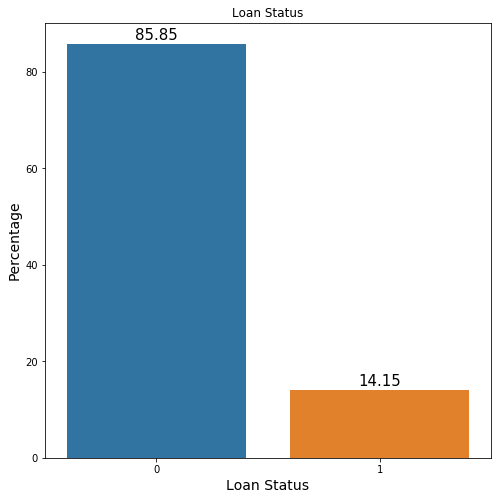

In [52]:
# Defining the plot size
plt.figure(figsize=(8,8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="index", y="loan_status", data=loan_status_perc)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Loan Status", size=14)
  
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
  
# Setting the title for the graph
plt.title("Loan Status")
  
# Fianlly showing the plot
plt.show()

- There are 14.15 percent of defaulters amongst all of them

# 2. UniVariate Analysis

### 1. Loan Amount

In [53]:
#check datatype
df.loan_amnt.dtype

dtype('int64')

In [54]:
df.loan_amnt.describe()

count    38329.000000
mean     11055.722169
std       7346.652882
min        500.000000
25%       5375.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

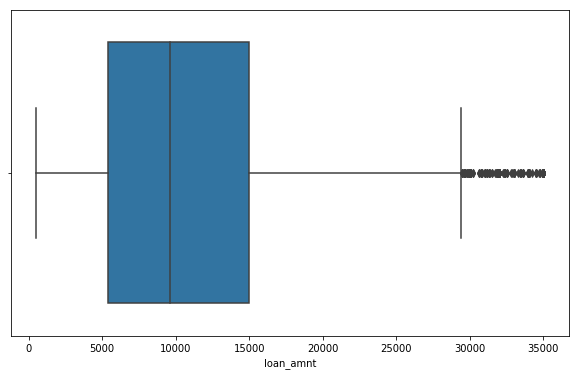

In [55]:
## draw a box  plot of loan_amount
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = "loan_amnt")

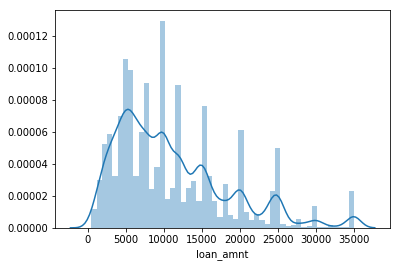

In [56]:
sns.distplot(df.loan_amnt)

- median loan_amount is 9600. Choosing this because of outliers
- std deviation doesn't matter, because loan amounts differ based on requirements. 
- Most of the loans are ranging in between 5300 to 15000
- Its left skewed as post 15000 the number of loans is decreasing and the max value is 35000

#### Let's bucket the borrowers into 7 buckets from 0-35000 amount and check the defaulters

In [57]:
df['loan_amnt_bucket'] = df.loan_amnt.apply(lambda x: (x//5000)+1 if (x%5000) > 0 else (x//5000))

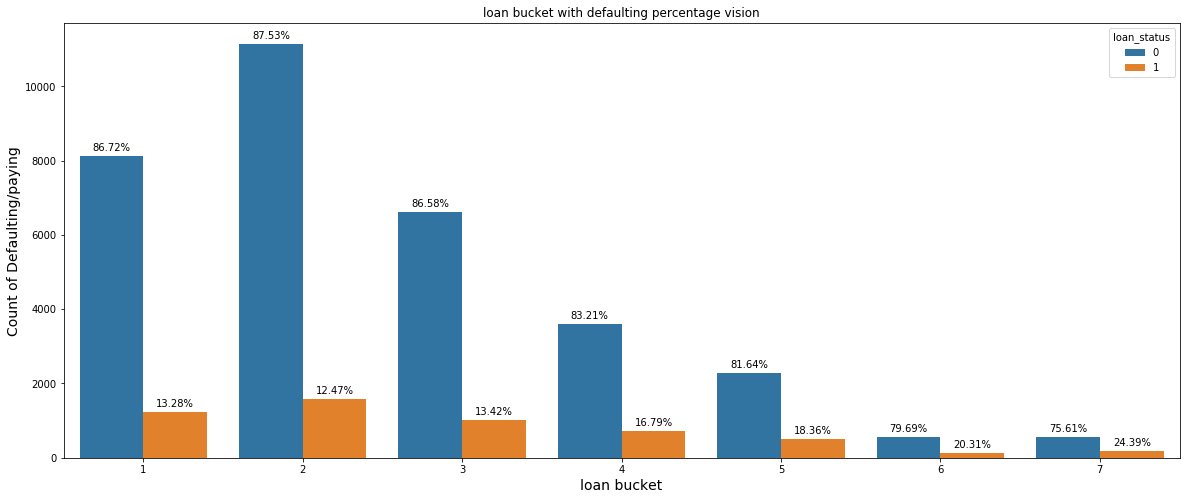

In [58]:
## lets plot the number of defaulters and non-defaulters in each bucket of loan-amount
plt.figure(figsize=(20,8))
plots=sns.countplot(x="loan_amnt_bucket", hue="loan_status", data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())

bars_0 = bar_lengths[0:7]
bars_1 = bar_lengths[7:]
# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<7:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-7]+bars_1[i-7]))
    plots.annotate(str(format(perc, '.2f'))+"%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("loan bucket", size=14)
  
# Setting the label for y-axis
plt.ylabel("Count of Defaulting/paying", size=14)
  
# Setting the title for the graph
plt.title("loan bucket with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()


- Above 15,000 i.e., from bucket 4 we see that defualting rate is increasing.
- in the buckets 0-5k , 5-10k and 10-15k we see similar defaulting rate around 13%
### We can infere here that , if the loan amounts are high, defaulting rate is increasing and paying fully is decreasing.

### 2) annual_inc

In [59]:
#taking describe to understand the data better
df.annual_inc.describe()

count    3.832900e+04
mean     6.884397e+04
std      6.426461e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [60]:
q1=df.annual_inc.quantile(.25)
q3=df.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value =",upper_extreme)
print("lower extreme value =",lower_extreme)

upper extreme value = 145000.0
lower extreme value = 0


- since there are no outliers on the lower side we can focus on the outliers above upper extreme.
- mean and standard deviation are very near to each other. It signifies there are lot of outliers on the upper side as seen above.

In [61]:
## lets focus on defaulter and non-defaulters separately
def_inc = df[df.loan_status == 1]
ndef_inc = df[df.loan_status == 0]

In [62]:
#describe defaulters
def_inc.annual_inc.describe().to_frame()

,annual_inc
count,5.423000e+03
mean,6.252366e+04
std,4.756885e+04
min,4.080000e+03
25%,3.744000e+04
50%,5.300000e+04
75%,7.500000e+04
max,1.250000e+06


In [63]:
##describe non_defaulters
ndef_inc.annual_inc.describe().to_frame()

,annual_inc
count,3.290600e+04
mean,6.988558e+04
std,6.655870e+04
min,4.000000e+03
25%,4.130000e+04
50%,6.000000e+04
75%,8.400000e+04
max,6.000000e+06


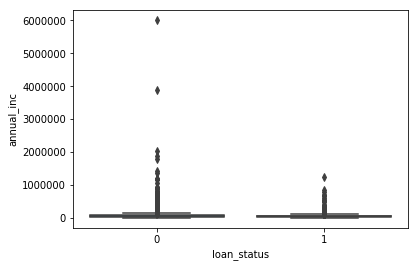

In [64]:
##checking outliers
sns.boxplot(data = df, x = "loan_status", y="annual_inc")

- Above 12,50000 we don't see any borrowers defaulting when seen at the box plot of 0 and 1

In [65]:
## lets check non-defaulter iqr and upper and lower limits
q1=ndef_inc.annual_inc.quantile(.25)
q3=ndef_inc.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value for non-defaulters=",upper_extreme)
print("lower extreme value for non-defaulters=",lower_extreme)

upper extreme value for non-defaulters= 148050.0
lower extreme value for non-defaulters= 0


In [66]:
## lets check non-defaulter iqr and upper and lower limits
q1=def_inc.annual_inc.quantile(.25)
q3=def_inc.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value for defaulters=",upper_extreme)
print("lower extreme value for defaulters=",lower_extreme)

upper extreme value for defaulters= 131340.0
lower extreme value for defaulters= 0


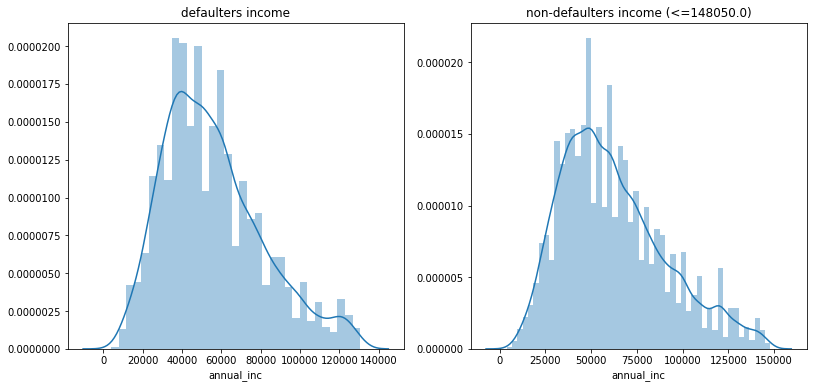

In [67]:
#plot the income within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters income")
ax[1].title.set_text("non-defaulters income (<=148050.0)")
sns.distplot(def_inc[def_inc.annual_inc<=131340.0].annual_inc,ax=ax[0])
sns.distplot(ndef_inc[ndef_inc.annual_inc<=148050].annual_inc,ax=ax[1])
fig.show()

- We see similar normal distribution for both the types within 3 standard devialtions data(till upper whisker length)
- Both of them have salaries ranging below 150000 itself. 

### Lets bucket the salaries on the main dataframe itself and check the defaulting percentages
    - Let'split into six buckets of 50000 difference till 150000
           - 1 -> 0-25000
           - 2 -> 25001 - 50000
           - 3 -> 50001 - 75000
           - 4 -> 75001-100000
           - 5 -> 100001 - 125000
           - 6 -> 125001 - 150000
           - 7 -> >150000

In [68]:
def income_buckets(x):
    if x> 150000:
        return 7
    else:
        if (x%25000) > 0:
            return (x//25000)+1
        else:
            return x//25000
df['income_bucket'] = df.annual_inc.apply(lambda x:  income_buckets(x))

In [69]:
df.income_bucket.value_counts().to_frame()

,income_bucket
2.0,12750
3.0,11607
4.0,6010
5.0,2682
1.0,2504
7.0,1482
6.0,1294


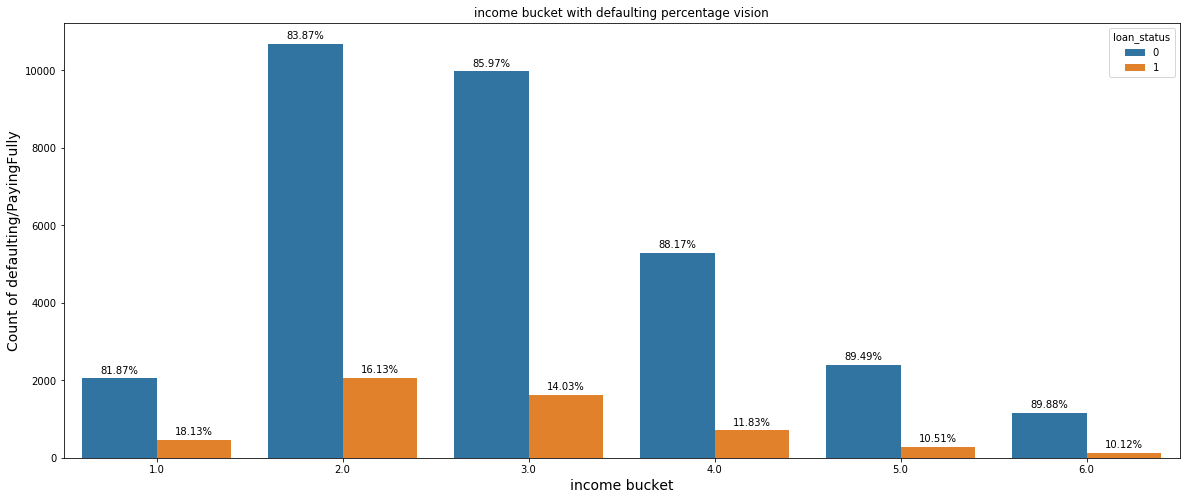

In [70]:
## lets plot the number of defaulters and non-defaulters in each bucket of income until 1500000
plt.figure(figsize=(20,8))
plots=sns.countplot(x="income_bucket", hue="loan_status", data=df[df.annual_inc<=150000])
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())

bars_0 = bar_lengths[0:6]
bars_1 = bar_lengths[6:]
# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<6:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-6]+bars_1[i-6]))
    plots.annotate(str(format(perc, '.2f'))+"%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("income bucket", size=14)
  
# Setting the label for y-axis
plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("income bucket with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

#### We can observe above that defaulting rate decreases as the income increases. The number went down from 18.13% to 10.12% accross 6 buckets of annual income til 150000. 

### 3) int_rate

In [71]:
##check the type of value for int_rate
df.dtypes['int_rate']

dtype('O')

In [72]:
##convert to float
df.int_rate = df.int_rate.apply(lambda x : float(x[:-1]))

In [73]:
##check the stats 
df.int_rate.describe()

count    38329.000000
mean        11.924646
std          3.694249
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

- We see that mean rate is around 12% 
- We see more of a near to normal distribution of rates , which might be based on other factors like reason, amount_loan,policy of company etc..
- Most of the loans in IQR are between 8.9% - 14.4% which is generally seen in most of the real life loans.

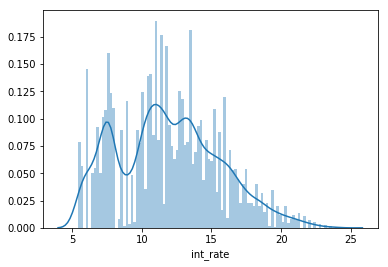

In [74]:
##lets check how is it spread accross loans
sns.distplot(df.int_rate,bins=100)

- As we saw we see more density from 9 - 14 around

In [75]:
## lets focus on defaulter and non-defaulters separately
def_df = df[df.loan_status == 1]
ndef_df = df[df.loan_status == 0]

In [76]:
##spread of int_rate accross defaulters
def_df.int_rate.describe().to_frame()

,int_rate
count,5423.000000
mean,13.861169
std,3.674305
min,5.420000
25%,11.360000
50%,13.610000
75%,16.450000
max,24.400000


In [77]:
##spread of int_rate accross non-defaulters
ndef_df.int_rate.describe().to_frame()

,int_rate
count,32906.000000
mean,11.605501
std,3.598917
min,5.420000
25%,8.490000
50%,11.490000
75%,13.990000
max,24.110000


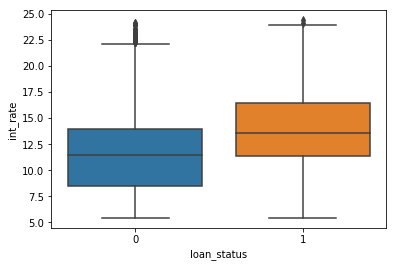

In [78]:
##checking outliers
sns.boxplot(data = df, x = "loan_status", y="int_rate")

- Defaulters have higher interest rates with 13.5 and non-defaulters having 11.5% median in the data

### 4) term 

In [79]:
# types of tenures
tenure = df.term.value_counts().to_frame()
tenure

,term
36 months,28872
60 months,9457


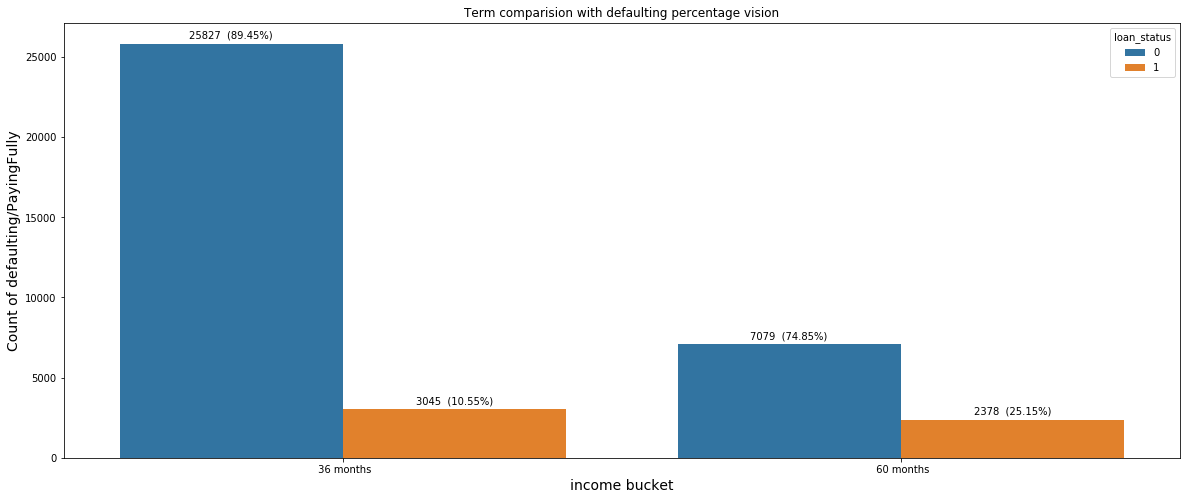

In [80]:
## lets plot the number of defaulters and non-defaulters in each type of term
plt.figure(figsize=(20,8))
plots=sns.countplot(x="term", hue="loan_status", data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())

bars_0 = bar_lengths[0:2]
bars_1 = bar_lengths[2:]
# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<2:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-2]+bars_1[i-2]))
    plots.annotate(str(format(bar.get_height(),'.0f'))+'  ('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("income bucket", size=14)
  
# Setting the label for y-axis
plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("Term comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

- we observe based on above plot, that defaulting rate has increased around 14.35% from 10.55 to 25.15 when the term changed from 3years to 5years. 
- Giving loans for lesser tenure sounds better!

### 5) Installment

In [81]:
#describing the installment column
df.installment.describe()

count    38329.000000
mean       322.547583
std        208.421669
min         15.690000
25%        165.820000
50%        278.070000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

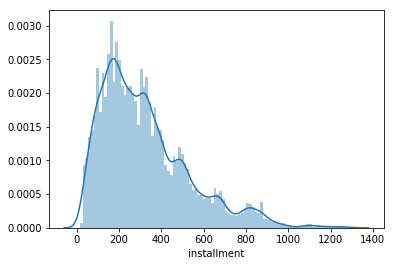

In [82]:
#lets take histogram to know behaviour of installment
sns.distplot(df.installment,bins=100)
plt.show()

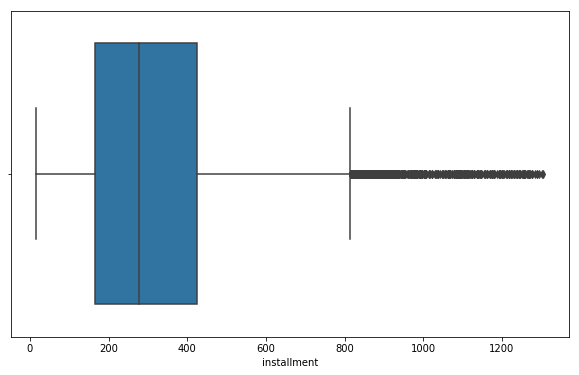

In [83]:
#There is lot of difference between 3rd quartile and max value. 
#Lets see outliers in the installment column through boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = "installment")
plt.show()

- it contains lot of outliers above upper whisker. It might be due to the people with higher salary taking higher loans
- IQR range is very less

In [84]:
##spread of installments accross defaulters
def_df.installment.describe().to_frame()

,installment
count,5423.000000
mean,336.001073
std,215.821954
min,22.790000
25%,169.720000
50%,294.370000
75%,456.195000
max,1305.190000


In [85]:
##spread of installments accross non-defaulters
ndef_df.installment.describe().to_frame()

,installment
count,32906.00000
mean,320.33041
std,207.09622
min,15.69000
25%,165.38000
50%,275.80500
75%,421.15000
max,1295.21000


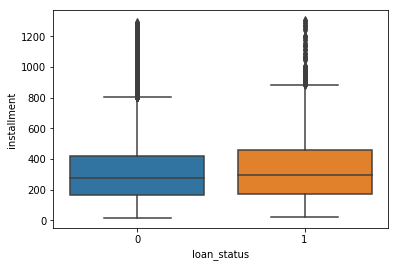

In [86]:
##checking outliers
sns.boxplot(data = df, x = "loan_status", y="installment")

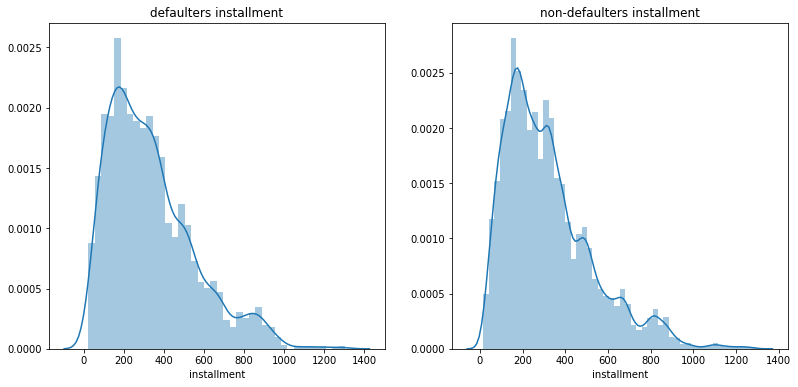

In [87]:
#plot the income within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters installment")
ax[1].title.set_text("non-defaulters installment")
sns.distplot(def_df.installment,ax=ax[0])
sns.distplot(ndef_df.installment,ax=ax[1])
fig.show()

In [88]:
## lets check non-defaulter iqr and upper and lower limits
q1=def_df.installment.quantile(.25)
q3=def_df.installment.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value of installment for defaulters=",upper_extreme)
print("lower extreme value of installment for defaulters=",lower_extreme)

upper extreme value of installment for defaulters= 885.9075
lower extreme value of installment for defaulters= 0


In [89]:
## lets check non-defaulter iqr and upper and lower limits
q1=ndef_df.installment.quantile(.25)
q3=ndef_df.installment.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value of installment for non-defaulters=",upper_extreme)
print("lower extreme value of installment for non-defaulters=",lower_extreme)

upper extreme value of installment for non-defaulters= 804.805
lower extreme value of installment for non-defaulters= 0


- Installments are similar to both the categories as its obvious that they will receive installements based on the loan amount approved.
- Both def and non-def have significant outliers due to high std.dev
- no significant difference in IQR as well for these both
- Similar behaviour to that of loan_amnt as installment is dependent on loan amnt and interest rate

### 6) verification_status 

In [90]:
#desribing total_pymnt column
df.verification_status .value_counts()

Not Verified       16505
Verified           12175
Source Verified     9649
Name: verification_status, dtype: int64

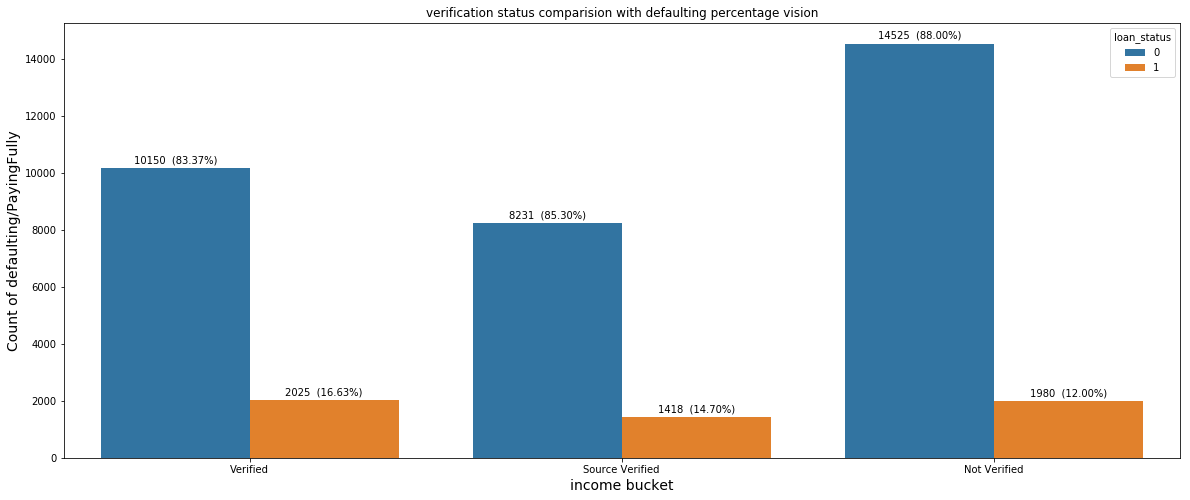

In [91]:
## lets plot the number of defaulters and non-defaulters based on verification status
plt.figure(figsize=(20,8))
plots=sns.countplot(x="verification_status", hue="loan_status", data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
n_buckets = 3
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    plots.annotate(str(format(bar.get_height(),'.0f'))+'  ('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("income bucket", size=14)
  
# Setting the label for y-axis

plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("verification status comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

In [92]:
## lets check the types of verification_status for defaulters category
verification_status = def_df.verification_status.value_counts().to_frame()
verification_status.reset_index(inplace=True)
verification_status = verification_status.rename(columns={'index':'verification_status','verification_status':'count'})
verification_status

,verification_status,count
0,Verified,2025
1,Not Verified,1980
2,Source Verified,1418


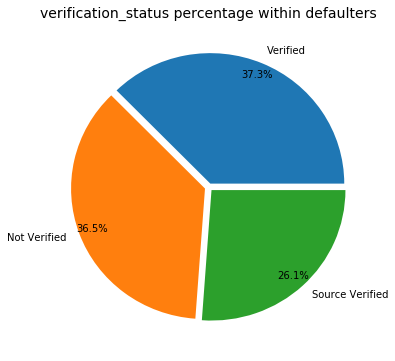

In [93]:
#lets draw a pie chart to get the percentage proportions for defaulters among verification_status
pie, ax = plt.subplots(figsize=[6,6])
labels = list(verification_status.verification_status)
# print(labels)
plt.pie(x=verification_status['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("verification_status percentage within defaulters", fontsize=14);
pie.savefig("verification_statusepie.png")

- Based on data we see that non-verified loans end up getting less defaulted than verified and source verified
- Even within only defaulters verified and non-verified are very close.

### 7) grade

In [94]:
## let's look at the type of grades in whole df
df.grade.value_counts()

B    11626
A    10031
C     7760
D     5020
E     2634
F      963
G      295
Name: grade, dtype: int64

In [95]:
perc_df=100*(df.grade.value_counts()/shape[0]).to_frame()
perc_df.reset_index(inplace=True)
perc_df

,index,grade
0,B,29.272100
1,A,25.256188
2,C,19.538233
3,D,12.639424
4,E,6.631921
5,F,2.424654
6,G,0.742755


[9441, 10246, 6476, 3951, 1941, 653, 198, 590, 1380, 1284, 1069, 693, 310, 97]


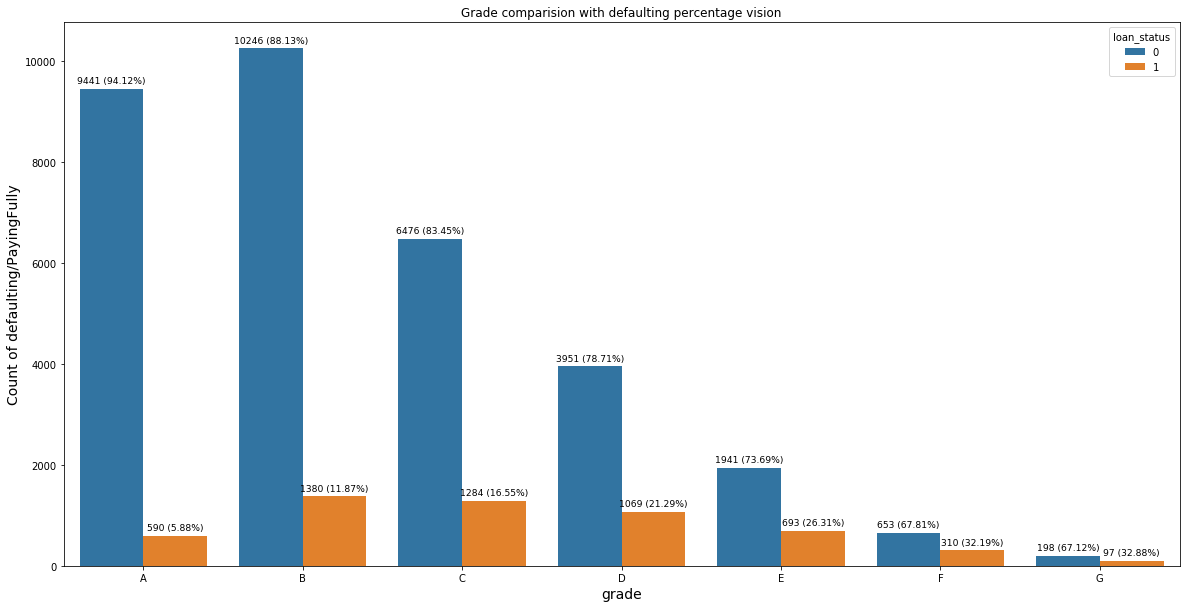

In [96]:
## lets plot the number of defaulters and non-defaulters based on grade
plt.figure(figsize=(20,10))
plots=sns.countplot(x="grade", hue="loan_status",data=df.sort_values("grade"))
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
print(bar_lengths)
n_buckets = 7
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    plots.annotate(str(format(bar.get_height(),'.0f'))+' ('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9.2, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("grade", size=14)
  
# Setting the label for y-axis

plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("Grade comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

- Looking at the Grades 
    - We can see that A type loan has very less defaulting rate of 5.8%
    - As we go from A to G , the defaulting rate is decreasing

In [97]:
## lets check the types of grades for defaulters category only
grades = def_df.grade.value_counts().to_frame()
grades.reset_index(inplace=True)
grades = grades.rename(columns={'index':'grades','grade':'count'})
grades

,grades,count
0,B,1380
1,C,1284
2,D,1069
3,E,693
4,A,590
5,F,310
6,G,97


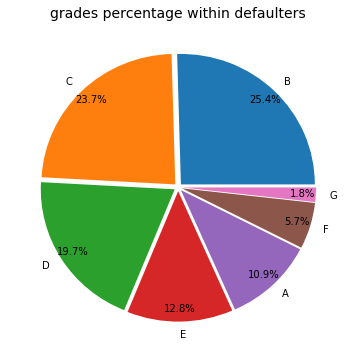

In [98]:
#lets draw a pie chart to get the percentage proportions for defaulters among grades
pie, ax = plt.subplots(figsize=[6,6])
labels = list(grades.grades)
# print(labels)
plt.pie(x=grades['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("grades percentage within defaulters", fontsize=14);
pie.savefig("gradespie.png")

- When looked only at defaulters , there are less defaulters in G and highest in B 

### 8) subgrade

In [99]:
## types of subgrades
df.sub_grade.value_counts()

A4    2872
B3    2820
A5    2710
B5    2605
B4    2422
C1    2039
B2    1990
C2    1912
A3    1805
B1    1789
A2    1506
C3    1474
D2    1270
C4    1195
C5    1140
A1    1138
D3    1104
D1     916
D4     905
D5     825
E1     719
E2     604
E3     509
E4     421
E5     381
F1     302
F2     230
F3     172
F4     148
F5     111
G1      91
G2      76
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

- We see that every grade has 5 subgrades with a suffix from 1-5

,sub_grade,def_perc,ndef_perc
0,A1,2.636204,97.363796
1,A2,4.780876,95.219124
2,A3,5.484765,94.515235
3,A4,6.162953,93.837047
4,A5,7.822878,92.177122


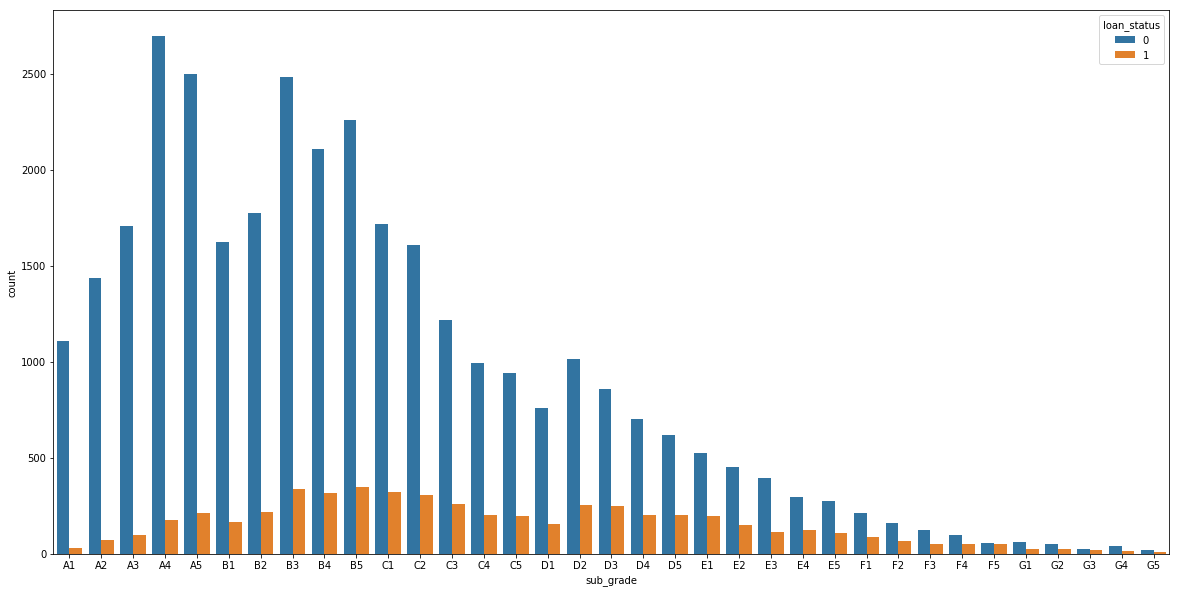

In [100]:
## lets plot the barplot of defaulters and non-defaulters based on grade
plt.figure(figsize=(20,10))
plots=sns.countplot(x="sub_grade", hue="loan_status",data=df.sort_values("sub_grade"))
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
# print(bar_lengths)
n_buckets = 35
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

percentages = []
# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    percentages.append(perc) ##append to percentage list

def_perc = percentages[35:]
sg_names = sorted(df.sub_grade.unique())
ndef_perc  = percentages[0:35]
new_df = pd.DataFrame({'sub_grade':sg_names,'def_perc':def_perc,'ndef_perc':ndef_perc})
new_df.head()

### Based on barplot its tough to understand the pattern in each subgrade of a grade, lets plot the percentages separately.
#### 1) Using the above code we have saved the percentages into a separate list for defaulters and non-defaulters grouped by sub_grade

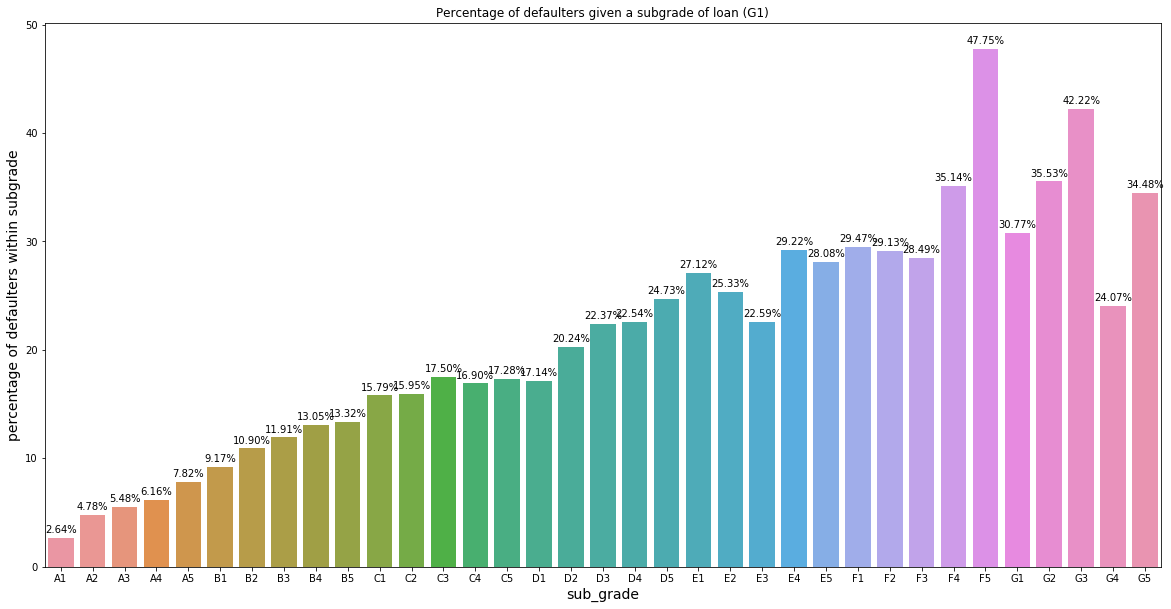

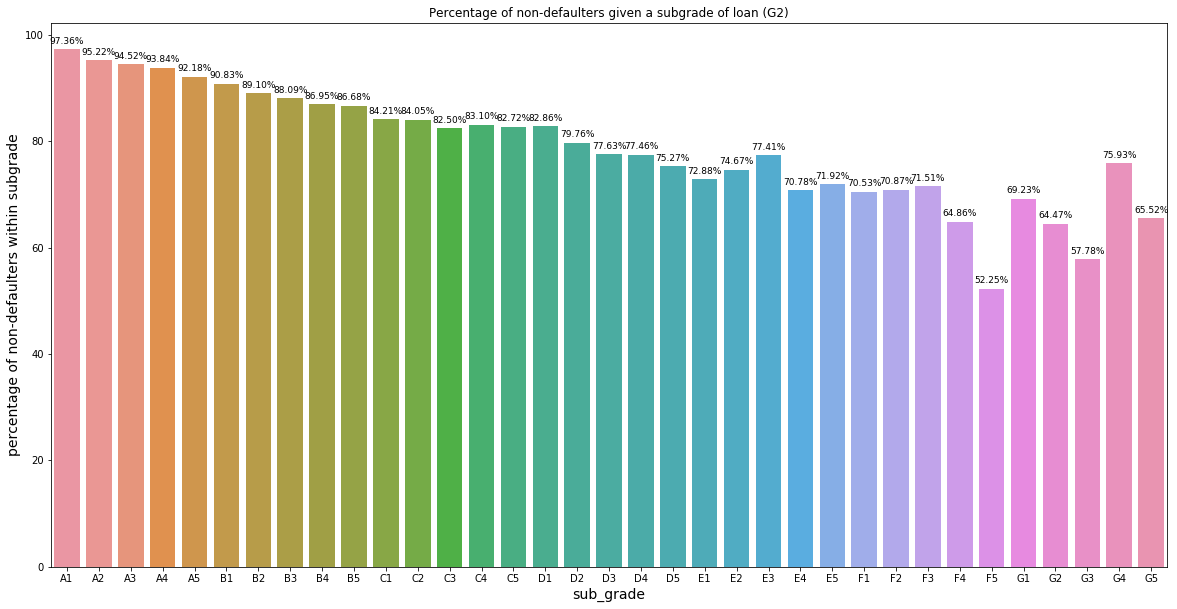

In [101]:
# ploting the bar chart with count will give us more insight on which purpose is high amongst all

plt.figure(figsize=(20,10))
plots=sns.barplot(data=new_df,x='sub_grade',y='def_perc')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(str(format(bar.get_height(), '.2f'))+"%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
# Setting the label for x-axis
plt.xlabel("sub_grade", size=14)
  
# Setting the label for y-axis
plt.ylabel("percentage of defaulters within subgrade", size=14)
  
# Setting the title for the graph
plt.title("Percentage of defaulters given a subgrade of loan (G1)")
  
# Fianlly showing the plot
plt.show()


# ploting the bar chart with count will give us more insight on which purpose is high amongst all

plt.figure(figsize=(20,10))
plots=sns.barplot(data=new_df,x='sub_grade',y='ndef_perc')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(str(format(bar.get_height(), '.2f'))+"%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
# Setting the label for x-axis
plt.xlabel("sub_grade", size=14)
  
# Setting the label for y-axis
plt.ylabel("percentage of non-defaulters within subgrade", size=14)
  
# Setting the title for the graph
plt.title("Percentage of non-defaulters given a subgrade of loan (G2)")
  
# Fianlly showing the plot
plt.show()



- Lets interpret the above graphs(G1 and G2) like this. For example if a borrower chooses A1 as his loan sub_grade, then there is 2.64% chances of him defaulting and 97.36% paying the whole loan. Bar1 in G1 + Bar2 in G2 = 100%
- Observations
    - We see that sub grades in F and G have high default rates above 25%
    - F5 records the highest default rate in all of the sub grades
    - all the subgrades in A are having very less default rates

### 9) home_ownership

In [102]:
#lets look at value distribution accroess different categories
df.home_ownership.value_counts()

RENT        18335
MORTGAGE    16946
OWN          2949
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

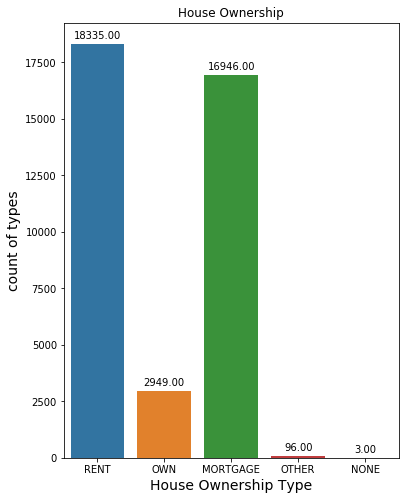

In [103]:
# lets look at data distribution of verification_status
plt.figure(figsize=(6,8))
plots=sns.countplot(data=df,x='home_ownership')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("House Ownership Type", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of types", size=14)
  
# Setting the title for the graph
plt.title("House Ownership")
  
# Fianlly showing the plot
plt.show()

[15616.0, 2526.0, 14683.0, 78.0, 3.0, 2719.0, 423.0, 2263.0, 18.0, nan]


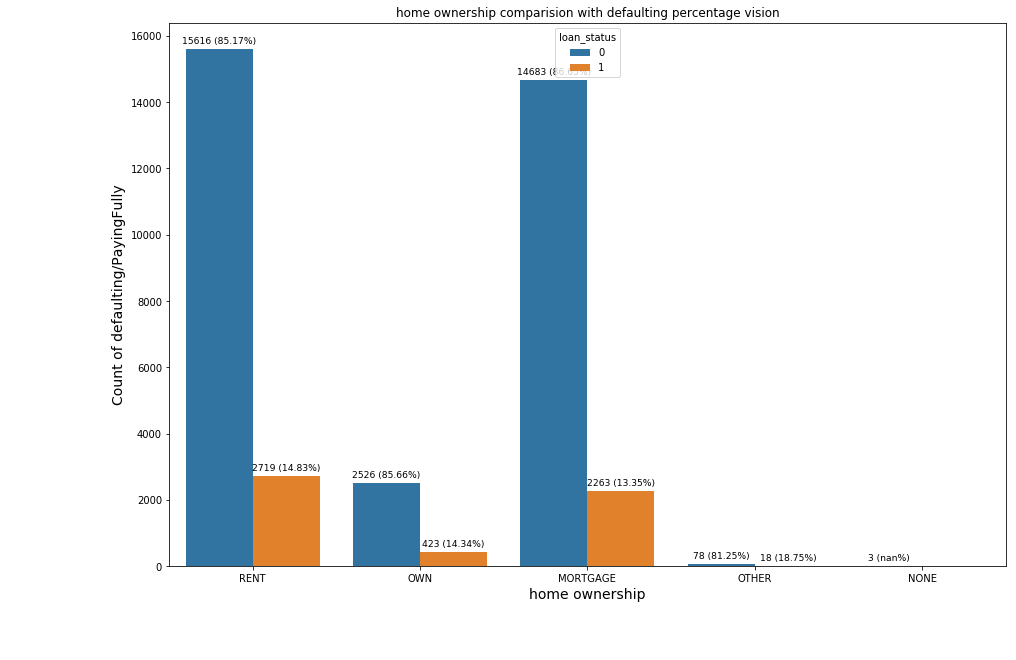

In [104]:
## lets plot the number of defaulters and non-defaulters based on home ownership
plt.figure(figsize=(15,10))
plots=sns.countplot(x="home_ownership", hue="loan_status",data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
print(bar_lengths)
n_buckets = 5
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    plots.annotate(str(format(bar.get_height(),'.0f'))+' ('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9.2, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("home ownership", size=14)
  
# Setting the label for y-axis

plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("home ownership comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

- we can see that defaulting percentage is independent of house_ownership type. 
- Above data can be read as, among rented 14.83% are defaulters, so are other categories similarly

  home_ownership  count
0           RENT   2719
1       MORTGAGE   2263
2            OWN    423
3          OTHER     18


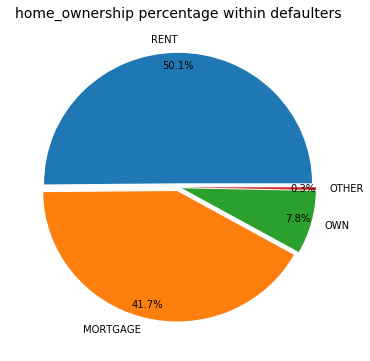

In [105]:
## lets check the types of grades for defaulters category only
home_ownership = def_df.home_ownership.value_counts().to_frame()
home_ownership.reset_index(inplace=True)
home_ownership = home_ownership.rename(columns={'index':'home_ownership','home_ownership':'count'})
print(home_ownership)
#lets draw a pie chart to get the percentage proportions for defaulters among home_ownership
pie, ax = plt.subplots(figsize=[6,6])
labels = list(home_ownership.home_ownership)
# print(labels)
plt.pie(x=home_ownership['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("home_ownership percentage within defaulters", fontsize=14);
pie.savefig("home_ownershipspie.png")

- Among the defaulters 50% of them are renting a home
- just 7.8% are owning one
- we can also see that 41.7% of the people have homes at mortage, which means its already kept as surity for something else.

### 10) emp_length


In [106]:
#lets look at value distribution of emp_length
df.emp_length.value_counts()

10+ years        8449
< 1 year         4460
2 years          4269
3 years          3995
4 years          3314
5 years          3174
1 year           3139
6 years          2157
7 years          1701
8 years          1427
9 years          1220
Not Available    1024
Name: emp_length, dtype: int64

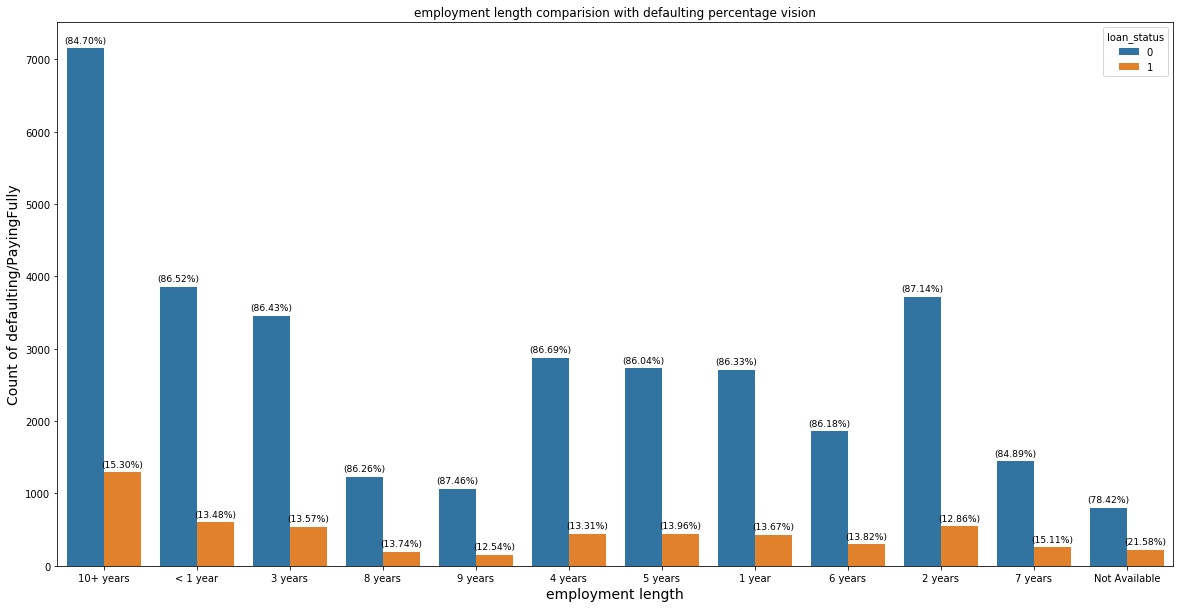

In [107]:
## lets plot the number of defaulters and non-defaulters based on employment length
plt.figure(figsize=(20,10))
plots=sns.countplot(x="emp_length", hue="loan_status",data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
# print(bar_lengths)
n_buckets = 12
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    plots.annotate('('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9.2, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("employment length", size=14)
  
# Setting the label for y-axis

plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("employment length comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

- defaulting percentage in 10 out of 12 categories is almost near to 13%.
- nothing insightful above

       emp_length  count
0       10+ years   1293
1        < 1 year    601
2         2 years    549
3         3 years    542
4         5 years    443
5         4 years    441
6          1 year    429
7         6 years    298
8         7 years    257
9   Not Available    221
10        8 years    196
11        9 years    153


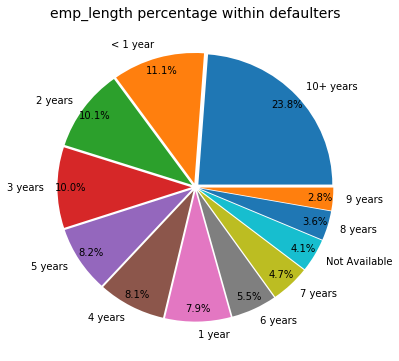

In [108]:
## lets check the types of emp_length for defaulters category only
emp_length = def_df.emp_length.value_counts().to_frame()
emp_length.reset_index(inplace=True)
emp_length = emp_length.rename(columns={'index':'emp_length','emp_length':'count'})
print(emp_length)
#lets draw a pie chart to get the percentage proportions for defaulters among emp_length
pie, ax = plt.subplots(figsize=[6,6])
labels = list(emp_length.emp_length)
# print(labels)
plt.pie(x=emp_length['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("emp_length percentage within defaulters", fontsize=14);
pie.savefig("emp_lengthpie.png")

- When looked at % of categories within defaulters only, we see that 24% of the borrowers have more than 10 years of experience.
- Something quite interesting here is the borrowers within 1 year of experience are defaulting more than people with higher experience.

### 11) purpose


In [109]:
#lets look at value distribution of emp_length
df.purpose.value_counts()

debt_consolidation    17961
credit_card            5013
other                  3827
home_improvement       2858
major_purchase         2134
small_business         1724
car                    1494
wedding                 916
medical                 678
moving                  571
vacation                374
house                   364
educational             314
renewable_energy        101
Name: purpose, dtype: int64

,purpose,def_perc,ndef_perc
2,debt_consolidation,25.928074,74.071926
12,vacation,17.821782,82.178218
13,wedding,15.923567,84.076433
3,educational,15.860988,84.139012
9,other,15.586690,84.413310
11,small_business,15.384615,84.615385
8,moving,15.339233,84.660767
5,house,14.932353,85.067647
10,renewable_energy,14.171123,85.828877
6,major_purchase,11.616515,88.383485


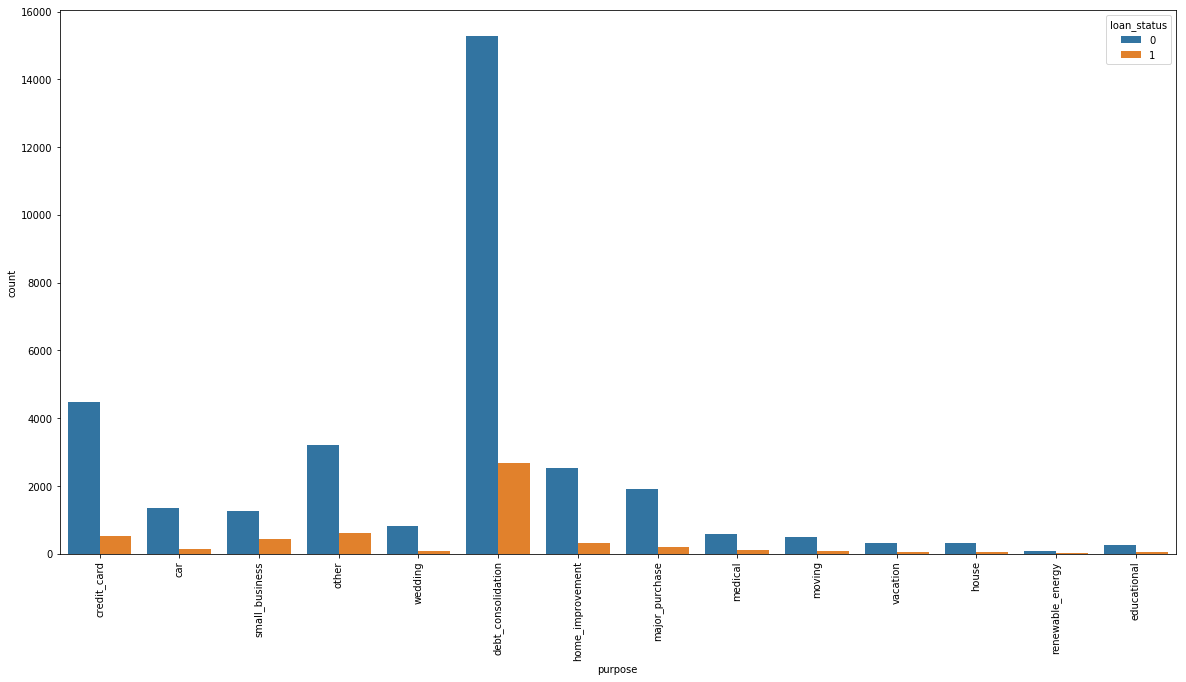

In [110]:
## lets plot the barplot of defaulters and non-defaulters based on purpose
plt.figure(figsize=(20,10))
plots=sns.countplot(x="purpose", hue="loan_status",data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
# print(bar_lengths)
n_buckets = 14
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

percentages = []
# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    percentages.append(perc) ##append to percentage list
plt.xticks(rotation='vertical')
def_perc = percentages[14:]
sg_names = sorted(df.purpose.unique())
ndef_perc  = percentages[0:14]
new_df = pd.DataFrame({'purpose':sg_names,'def_perc':def_perc,'ndef_perc':ndef_perc})
new_df.sort_values('def_perc',ascending=False)

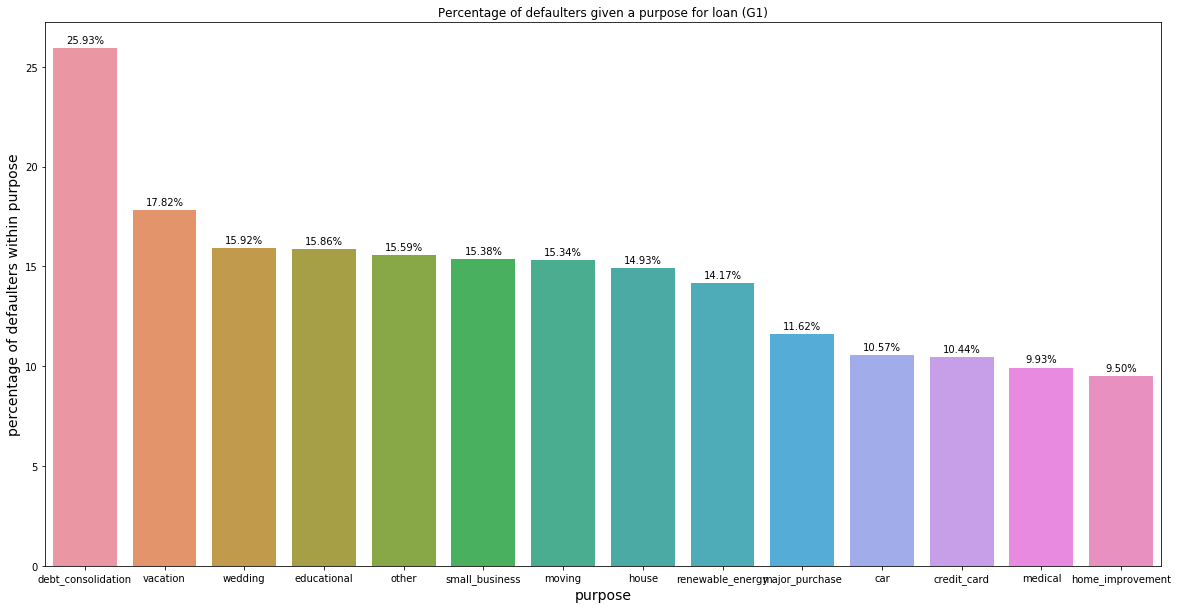

In [111]:
# ploting the bar chart with count will give us more insight on which purpose is high amongst all

plt.figure(figsize=(20,10))
plots=sns.barplot(data=new_df.sort_values('def_perc',ascending=False),x='purpose',y='def_perc')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(str(format(bar.get_height(), '.2f'))+"%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
# Setting the label for x-axis
plt.xlabel("purpose", size=14)
  
# Setting the label for y-axis
plt.ylabel("percentage of defaulters within purpose", size=14)
  
# Setting the title for the graph
plt.title("Percentage of defaulters given a purpose for loan (G1)")
  
# Fianlly showing the plot
plt.show()

- the above plot shows percentage of defaulters within a given purpose.
- we can see that defaulting percentage is higher for debt_consolidation borrowers i.e. 26% 

In [112]:
## lets check the types of purposes for defaulters category
purpose = def_df.purpose.value_counts().to_frame()
purpose.reset_index(inplace=True)
purpose = purpose.rename(columns={'index':'purpose','purpose':'count'})
purpose

,purpose,count
0,debt_consolidation,2682
1,other,607
2,credit_card,530
3,small_business,447
4,home_improvement,332
5,major_purchase,212
6,car,156
7,medical,104
8,moving,89
9,wedding,87


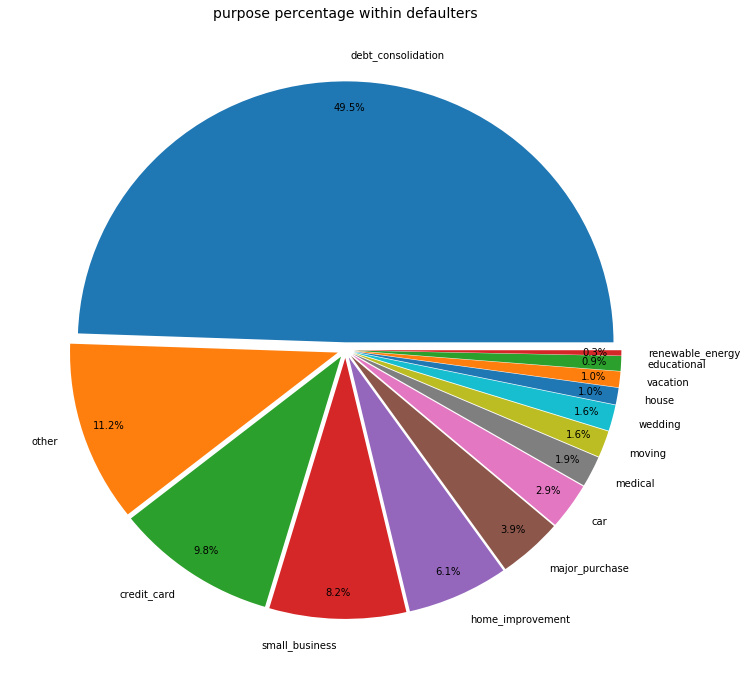

In [113]:
#lets draw a pie chart to get the percentage proportions for defaulters among di purpose
pie, ax = plt.subplots(figsize=[12,12])
labels = list(purpose.purpose)
# print(labels)
plt.pie(x=purpose['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("purpose percentage within defaulters", fontsize=14);
pie.savefig("purposepie.png")

- purpose field seems to be the key factor in determining loan defaulter
- we can see that  people buying loan for debt_consolidation are very much likely to default which accounts to almost 50% of purpose for loan buying


### 12) dti 
- debt to income ratio.
- less it is, more reliable a borrower will be

In [114]:
#checking the type of dtype
df.dti.dtype

dtype('float64')

In [115]:
df.dti.describe()

count    38329.000000
mean        13.282998
std          6.669388
min          0.000000
25%          8.150000
50%         13.380000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [116]:
## lets see how the defaulter spread looks like
def_df.dti.describe()

count    5423.000000
mean       14.071175
std         6.564164
min         0.000000
25%         9.180000
50%        14.350000
75%        19.330000
max        29.850000
Name: dti, dtype: float64

In [117]:
## lets see how the defaulter spread looks like
ndef_df.dti.describe()

count    32906.000000
mean        13.153104
std          6.677746
min          0.000000
25%          7.990000
50%         13.200000
75%         18.400000
max         29.990000
Name: dti, dtype: float64

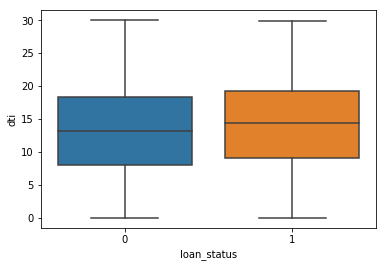

In [118]:
sns.boxplot(data = df,y="dti",x='loan_status')

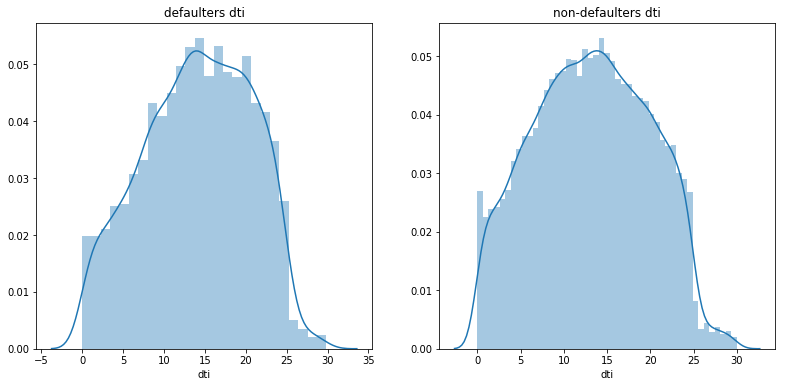

In [119]:
#plot the dti within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters dti")
ax[1].title.set_text("non-defaulters dti")
sns.distplot(def_df.dti,ax=ax[0])
sns.distplot(ndef_df.dti,ax=ax[1])
fig.show()

- we can see that non-defaulters have good spread on both the sides of the mean
- defaulters have less spread on the left, which says that they have little more dti in general than non-defaulters
- even non defaulters have high dti on the right of mean, similar to defaulters. So not a great indicator for defaulting.

### 13) open_acc
- Number of open credit lines.

In [120]:
## lets check no of open credit lines
def_open_acc = df[df.loan_status == 1].open_acc.value_counts().to_frame()
def_open_acc.reset_index(inplace=True)
def_open_acc = def_open_acc.rename(columns={'index':'def_open_acc','open_acc':'count'})
top5 = def_open_acc.head()
top5

,def_open_acc,count
0,7,532
1,8,530
2,6,527
3,9,501
4,10,455


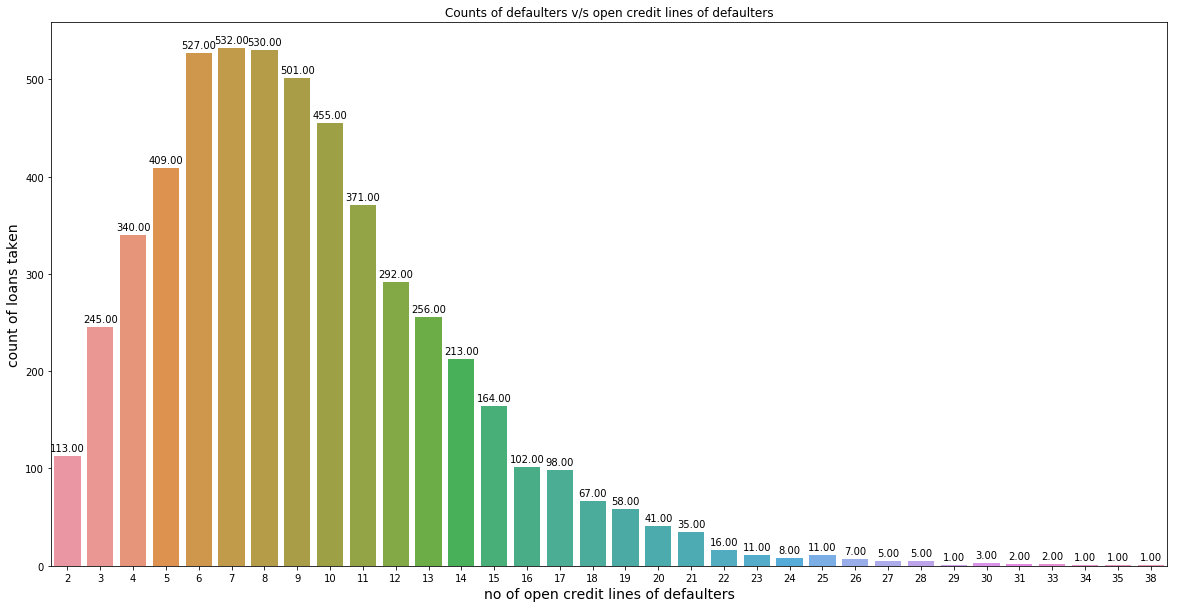

In [121]:
# lets get the distribution of credit lines for defaulters
plt.figure(figsize=(20,10))
plots=sns.barplot(data=def_open_acc,x='def_open_acc',y='count')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("no of open credit lines of defaulters", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of defaulters", size=14)
  
# Setting the title for the graph
plt.title("Counts of defaulters v/s open credit lines of defaulters")
  
# Fianlly showing the plot
plt.show()

- We can see that lines between 5-10 have more number of defaulters

In [122]:
## lets check no of open credit lines
ndef_open_acc = df[df.loan_status == 0].open_acc.value_counts().to_frame()
ndef_open_acc.reset_index(inplace=True)
ndef_open_acc = ndef_open_acc.rename(columns={'index':'ndef_open_acc','open_acc':'count'})
top5 = ndef_open_acc.head()
top5

,ndef_open_acc,count
0,7,3350
1,6,3299
2,8,3265
3,9,3086
4,5,2684


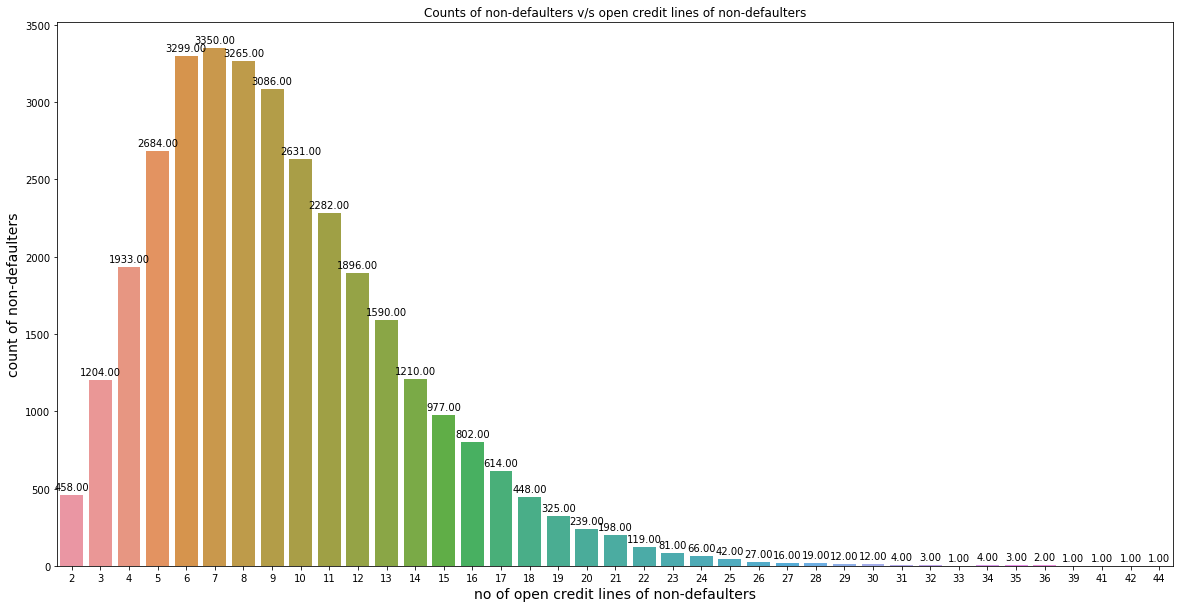

In [123]:
# lets get the distribution of credit lines for defaulters
plt.figure(figsize=(20,10))
plots=sns.barplot(data=ndef_open_acc,x='ndef_open_acc',y='count')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("no of open credit lines of non-defaulters", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of non-defaulters", size=14)
  
# Setting the title for the graph
plt.title("Counts of non-defaulters v/s open credit lines of non-defaulters")
  
# Fianlly showing the plot
plt.show()

- Even non-defaulters have similar number of credit lines. If looked together for defaulters and non-defaulters, then the number of credit lines doesn't make much value.

In [124]:
def_df.open_acc.describe()

count    5423.000000
mean        9.210769
std         4.501323
min         2.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64

In [125]:
ndef_df.open_acc.describe()

count    32906.000000
mean         9.296633
std          4.378615
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

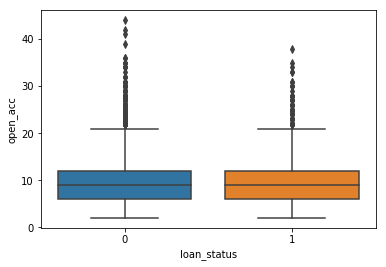

In [126]:
#lets see the box plots
sns.boxplot(data = df,y="open_acc",x='loan_status')


- When looked numerically, both the categories are distributed very similarly.
- The values of mean and median are also almost close. 
- Its better, we donot work with this column and drop it

In [127]:
df.drop(columns=['open_acc'],inplace = True)
def_df.drop(columns=['open_acc'],inplace = True)
ndef_df.drop(columns=['open_acc'],inplace = True)

### 14) pub_rec_bankruptcies

In [128]:
## lets check the types of bankruptcies
bankruptcies = df.pub_rec_bankruptcies.value_counts().to_frame()
bankruptcies.reset_index(inplace=True)
bankruptcies = bankruptcies.rename(columns={'index':'no_bankruptcies','pub_rec_bankruptcies':'count'})
bankruptcies

,no_bankruptcies,count
0,0.0,36694
1,1.0,1630
2,2.0,5


[31633, 1270, 3, 5061, 360, 2]


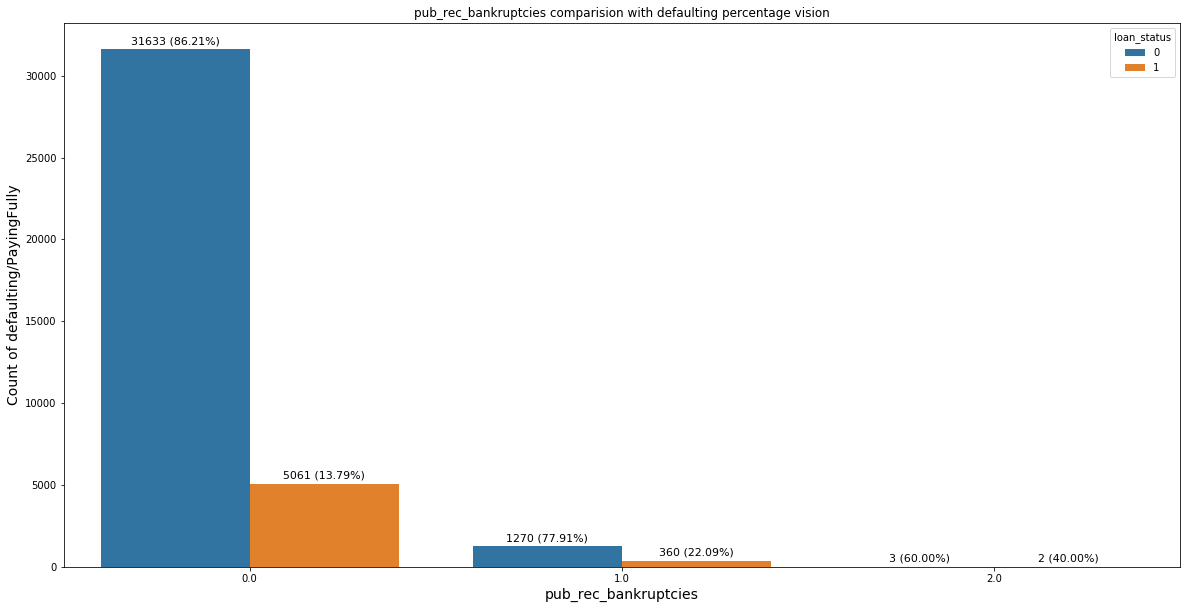

In [129]:
## lets plot the number of defaulters and non-defaulters based on pub_rec_bankruptcies
plt.figure(figsize=(20,10))
plots=sns.countplot(x="pub_rec_bankruptcies", hue="loan_status",data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
print(bar_lengths)
n_buckets = 3
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    plots.annotate(str(format(bar.get_height(),'.0f'))+' ('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("pub_rec_bankruptcies", size=14)
  
# Setting the label for y-axis

plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("pub_rec_bankruptcies comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

- As number of bankruptcies are increasing, the defaulting rate is also increasing

   pub_rec_bankruptcies  count
0                   0.0   5061
1                   1.0    360
2                   2.0      2


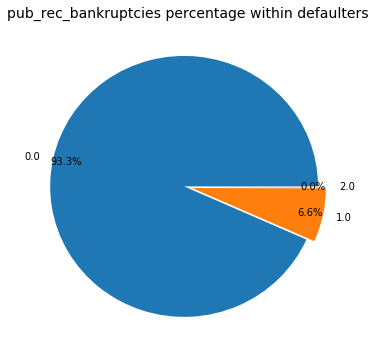

In [130]:
## lets check the types of pub_rec_bankruptcies for defaulters category only
pub_rec_bankruptcies = def_df.pub_rec_bankruptcies.value_counts().to_frame()
pub_rec_bankruptcies.reset_index(inplace=True)
pub_rec_bankruptcies = pub_rec_bankruptcies.rename(columns={'index':'pub_rec_bankruptcies','pub_rec_bankruptcies':'count'})
print(pub_rec_bankruptcies)
#lets draw a pie chart to get the percentage proportions for defaulters among pub_rec_bankruptcies
pie, ax = plt.subplots(figsize=[6,6])
labels = list(pub_rec_bankruptcies.pub_rec_bankruptcies)
# print(labels)
plt.pie(x=pub_rec_bankruptcies['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("pub_rec_bankruptcies percentage within defaulters", fontsize=14);
pie.savefig("pub_rec_bankruptciespie.png")

- Among the defaulters, there are 93% with 0 bankruptcies

### 15) revol_utilization

In [131]:
#check the values
df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [132]:
## lets convert it from percentage to float value for analysis
df.revol_util = df.revol_util.apply(lambda x: float(x[:-1]))

##do the same onto these dependent dataframes
def_df.revol_util =def_df.revol_util.apply(lambda x: float(x[:-1]))
ndef_df.revol_util = ndef_df.revol_util.apply(lambda x: float(x[:-1]))
df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [133]:
#lets see the spread of defaulters in revol_util
def_df.revol_util.describe()

count    5423.000000
mean       55.809701
std        27.843808
min         0.000000
25%        34.750000
50%        58.900000
75%        79.150000
max        99.900000
Name: revol_util, dtype: float64

In [134]:
#lets see the spread of non-defaulters in revol_util
ndef_df.revol_util.describe()

count    32906.000000
mean        47.532397
std         28.274710
min          0.000000
25%         23.900000
50%         47.600000
75%         70.800000
max         99.900000
Name: revol_util, dtype: float64

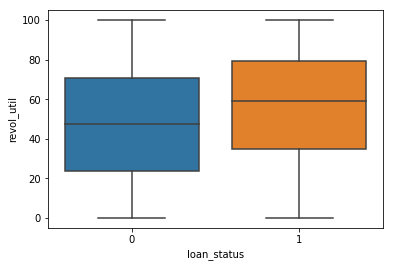

In [135]:
#boxplot of defaulters and non-defaulters for revol_util
sns.boxplot(data = df,x='loan_status',y='revol_util')


- There are no outliers present
- defaulters have higher credit utilization with a mean utilization of 55% around, than non-defaulters who have around 47%

### 14) total_acc

In [141]:
## lets check no of  credit lines for defaulters
def_total_acc = df[df.loan_status == 1].total_acc.value_counts().to_frame()
def_total_acc.reset_index(inplace=True)
def_total_acc = def_total_acc.rename(columns={'index':'total_acc','total_acc':'count'})
top5 = def_total_acc.head()
top5

,total_acc,count
0,14,224
1,16,215
2,17,195
3,15,194
4,13,188


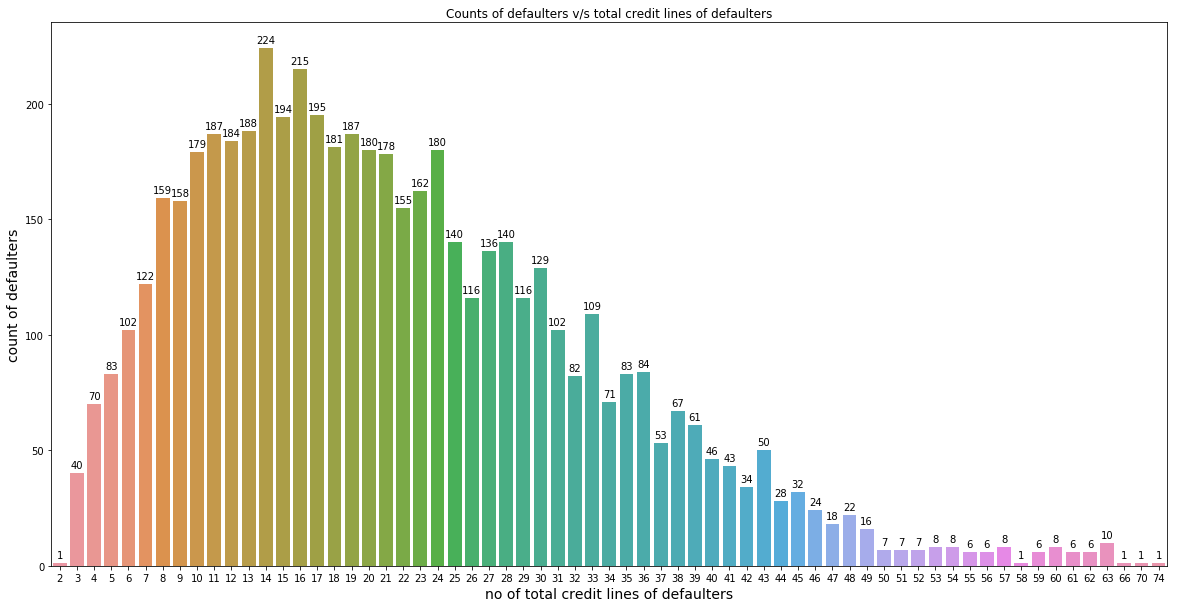

In [145]:
# lets get the distribution of total credit lines for defaulters
plt.figure(figsize=(20,10))
plots=sns.barplot(data=def_total_acc,x='total_acc',y='count')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("no of total credit lines of defaulters", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of defaulters", size=14)
  
# Setting the title for the graph
plt.title("Counts of defaulters v/s total credit lines of defaulters")
  
# Fianlly showing the plot
plt.show()

- count of defaulters has a normal graph
- lets work numerically

In [146]:
def_df.total_acc.describe()

count    5423.000000
mean       21.574405
std        11.426329
min         2.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        74.000000
Name: total_acc, dtype: float64

In [147]:
ndef_df.total_acc.describe()

count    32906.000000
mean        22.172370
std         11.415433
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

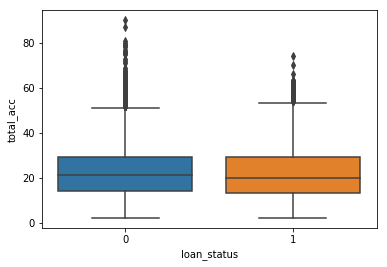

In [148]:
#boxplot of defaulters and non-defaulters for total_acc
sns.boxplot(data = df,x='loan_status',y='total_acc')

- We can see that both the categories have same kind of distribution in box plot.
- We cannot conclude anything on defaulting here due to its similar distributions on non defaulting
- Let's drop this column

In [150]:
df.drop(columns=['total_acc'],inplace = True)
def_df.drop(columns=['total_acc'],inplace = True)
ndef_df.drop(columns=['total_acc'],inplace = True)

KeyError: "labels ['total_acc'] not contained in axis"

### 15) pub_rec


In [151]:
## lets check the types of public degrogatories
deg = df.pub_rec.value_counts().to_frame()
deg.reset_index(inplace=True)
deg = deg.rename(columns={'index':'no_pub_rec','pub_rec':'count'})
deg

,no_pub_rec,count
0,0,36274
1,1,1998
2,2,48
3,3,7
4,4,2


[31305.0, 1554.0, 38.0, 7.0, 2.0, 4969.0, 444.0, 10.0, nan, nan]


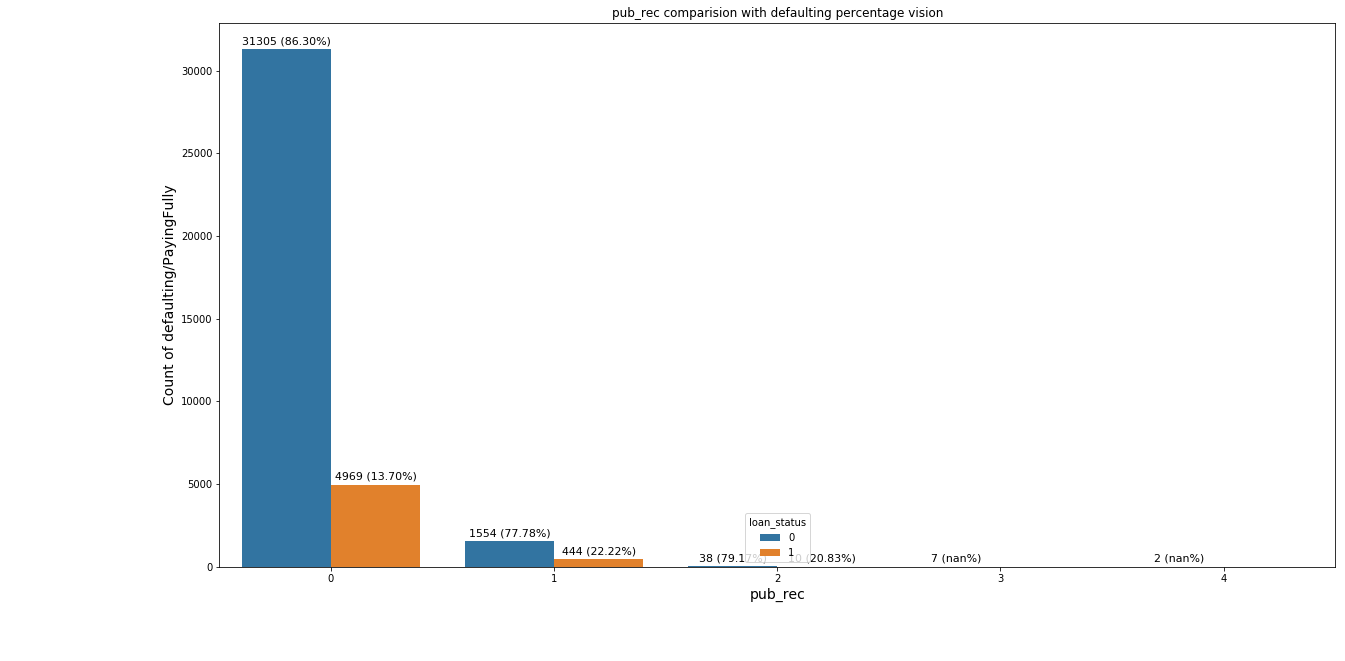

In [153]:
## lets plot the number of defaulters and non-defaulters based on pub_rec_bankruptcies
plt.figure(figsize=(20,10))
plots=sns.countplot(x="pub_rec", hue="loan_status",data=df)
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
print(bar_lengths)
n_buckets = 5
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    plots.annotate(str(format(bar.get_height(),'.0f'))+' ('+str(format(perc, '.2f'))+"%)", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("pub_rec", size=14)
  
# Setting the label for y-axis

plt.ylabel("Count of defaulting/PayingFully", size=14)
  
# Setting the title for the graph
plt.title("pub_rec comparision with defaulting percentage vision")
  
# Fianlly showing the plot
plt.show()

   pub_rec  count
0        0   4969
1        1    444
2        2     10


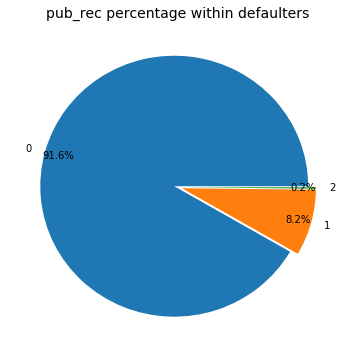

In [154]:
## lets check the types of pub_rec for defaulters category only
pub_rec = def_df.pub_rec.value_counts().to_frame()
pub_rec.reset_index(inplace=True)
pub_rec = pub_rec.rename(columns={'index':'pub_rec','pub_rec':'count'})
print(pub_rec)
#lets draw a pie chart to get the percentage proportions for defaulters among pub_rec
pie, ax = plt.subplots(figsize=[6,6])
labels = list(pub_rec.pub_rec)
# print(labels)
plt.pie(x=pub_rec['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("pub_rec percentage within defaulters", fontsize=14);
pie.savefig("pub_recpie.png")

- We see that 91.6% of them within the defaulters are with 0 records. 
- Nothing insightful out of this column, because non-defaulters also will have the similar prop

### 3) Derived Metrics